# Technical Training: Assignment 2
## Credit Card Defaulter Classification

## A Classifier model to predict the credit card defaulter for a given dataset

# Importing necessary libraries and the dataset

In [52]:
# Importing necessary libraries

import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing LabelEncoder from sci-kit learn
from sklearn.preprocessing import LabelEncoder

# Importing StandardScalar
from sklearn.preprocessing import StandardScaler

# Importing the train_test_split
from sklearn.model_selection import train_test_split

# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing libraries for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Importing XGBoost
import xgboost as xgb

In [22]:
# Importing the dataset
data = pd.read_csv('credit_card_defaulter.csv',index_col=0)

# Data Visualization and Augmentation

## Understanding the data

In [23]:
# Head of the dataset
data.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [24]:
# Information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


So here, default is our target class, while student, balance and income are our features

In [25]:
# Summary statistics
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


## Exploratory Data Analysis

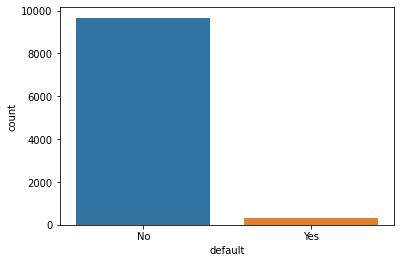

In [26]:
# To see how many records are of defaulters with respect to the total records
sns.countplot(x='default',data=data)

The given dataset is highly imbalanced. This is because, in the entire data, only a very few people are actually defaulters.

Prediction using such an imbalanced dataset is erroneous. Dataset should be balanced. 

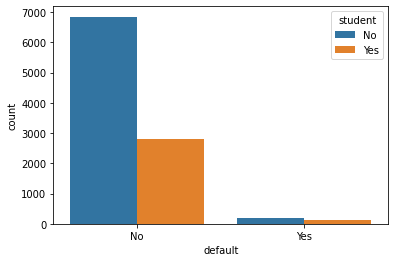

In [27]:
# How many of the two groups are students?
sns.countplot(x='default',hue='student',data=data)

In the non-defaulter group, maximum people are not students; while in the defaulter group, number of students is more or less equal to the number of non-students.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


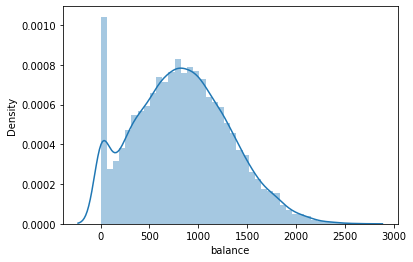

In [28]:
# Distribution of balance
sns.distplot(data['balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


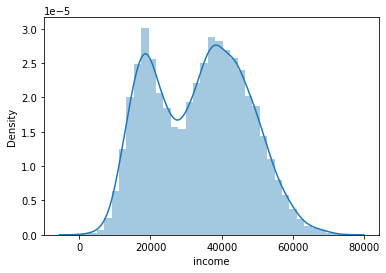

In [29]:
# Distribution of income in the data
sns.distplot(data['income'])

The distribution of income is bimodal.

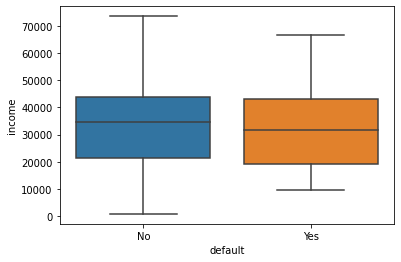

In [30]:
# Distribution of income for the two groups of people
sns.boxplot(x='default',y='income',data=data)

The median income of the two groups of people is more or less same.

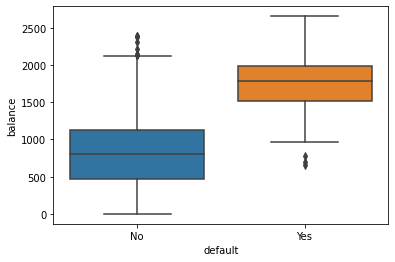

In [31]:
# Distribution of balance for the two groups of people
sns.boxplot(x='default',y='balance',data=data)

The median balance of the non-defaulters is much less than the median balance of the defaulter group.

## Missing Values

In [32]:
# Looking for missing values in the data
data.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

There are no missing values in the dataset.

## Preparing the data

### One-hot encoding of the default and the student column.

In [33]:
# Dummification of the target column default and the student column

data['default'] = pd.get_dummies(data['default'],drop_first = True)
data['student'] = pd.get_dummies(data['student'],drop_first = True)

# Checking the head of the data
data.head()

,default,student,balance,income
1,0,0,729.526495,44361.62507
2,0,1,817.180407,12106.13470
3,0,0,1073.549164,31767.13895
4,0,0,529.250605,35704.49394
5,0,0,785.655883,38463.49588


*We would have scaled the data, but since we are going to use tree based methods for classification, we are not scaling the data.*

### Segregating the data into features and target class

In [34]:
X = data.drop('default',axis=1) # Features for predicting
y = data['default'] # Target class

### Splitting the data 

Splitting the data into training and testing data

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=101)

## Printing the shape of the training and testing data

In [36]:
# Shapes of training and testing data
print("Shape of the training data of X: ",X_train.shape)
print("Shape of the training data of y: ",y_train.shape)
print("Shape of the testing data of X: ",X_test.shape)
print("Shape of the testing data of y: ",y_test.shape)

Shape of the training data of X:  (6700, 3)
Shape of the training data of y:  (6700,)
Shape of the testing data of X:  (3300, 3)
Shape of the testing data of y:  (3300,)


# Random Forest Classifier

Here, I use the Random Forest Classifier model.

In [38]:
# Creating an instance of RandomForestClassifier
rfc = RandomForestClassifier()

# Fitting the model to the training data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
# Predictions from the model
rf_pred = rfc.predict(X_test)

In [51]:
# Model Evaluation

print("Accuracy Score: ",accuracy_score(y_test,rf_pred))
print("F1 Score: ", f1_score(y_test,rf_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,rf_pred))
print("\n")
print("Classification report: \n", classification_report(y_test,rf_pred))
print("ROC_AUC score: ",roc_auc_score(y_test,rf_pred))

Accuracy Score:  0.9696969696969697
F1 Score:  0.3670886075949367
Confusion Matrix: 
 [[3171   26]
 [  74   29]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3197
           1       0.53      0.28      0.37       103

    accuracy                           0.97      3300
   macro avg       0.75      0.64      0.68      3300
weighted avg       0.96      0.97      0.97      3300

ROC_AUC score:  0.636710386861469


**Model Evaluation:**
1. Accuracy = 0.97. This means that, the model made 97% correct predictions out of the total predictions made by the model. However, accuracy is not a good metric in case of imbalance classes.

2. The confusion matrix says that:
  True Positive = 3171
  False Positive = 74
  True Negative = 29
  False Negative = 26

3. F1 Score for non-defaulters = 98%
  F1 score for defaulters = 37%
  F1 score is the harmonic mean of precision and recall.




In [49]:
# ROC curve
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, rf_pred)

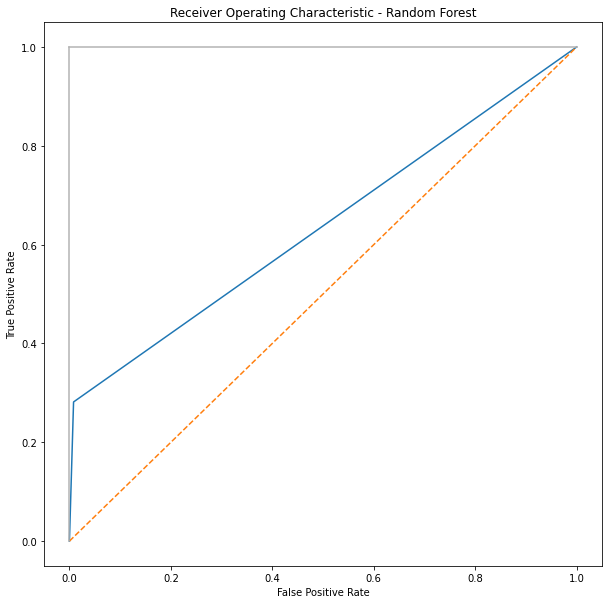

In [50]:
# Plotting the ROC curve for Random Forest model
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost method:

Here I use the XGBoost on the dataset.

In [53]:
# Instance of XBGClassifier
xg_model = xgb.XGBClassifier()

# Fitting the model on the training dataset
xg_model.fit(X_train,y_train)

# Printing the model
print(xg_model)

XGBClassifier()


In [54]:
# Prediction from the XGBoost model
xg_pred = xg_model.predict(X_test)

In [55]:
# Model Evaluation

print("Accuracy Score: ",accuracy_score(y_test,xg_pred))
print("F1 Score: ", f1_score(y_test,xg_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,xg_pred))
print("\n")
print("Classification report: \n", classification_report(y_test,xg_pred))
print("ROC_AUC score: ",roc_auc_score(y_test,xg_pred))

Accuracy Score:  0.9757575757575757
F1 Score:  0.44444444444444436
Confusion Matrix: 
 [[3188    9]
 [  71   32]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3197
           1       0.78      0.31      0.44       103

    accuracy                           0.98      3300
   macro avg       0.88      0.65      0.72      3300
weighted avg       0.97      0.98      0.97      3300

ROC_AUC score:  0.653932236228746


**Model Evaluation:**
1. Accuracy = 0.98. This means that, the model made 98% correct predictions out of the total predictions made by the model. However, accuracy is not a good metric in case of imbalance classes.

2. The confusion matrix says that:
  True Positive = 3188
  False Positive = 71
  True Negative = 9
  False Negative = 31

3. F1 Score for non-defaulters = 99%
  F1 score for defaulters = 44%
  F1 score is the harmonic mean of precision and recall.

In [56]:
# ROC curve
false_positive_rate_xg, true_positive_rate_xg, threshold_xg = roc_curve(y_test, xg_pred)

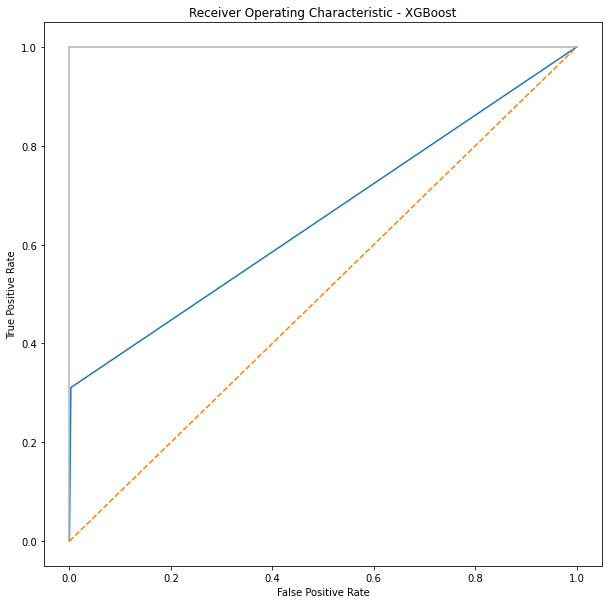

In [57]:
# Plotting the ROC curve for XGBoost model
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate_xg, true_positive_rate_xg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparing between the Random Forest model and the XGBoost model

In [58]:
# Comparing the Area Under the ROC curve for the two algorithms
print("ROC_AUC score for Random Forest model: ",roc_auc_score(y_test,rf_pred))
print("ROC_AUC score for XGBoost model: ",roc_auc_score(y_test,xg_pred))

ROC_AUC score for Random Forest model:  0.636710386861469
ROC_AUC score for XGBoost model:  0.653932236228746


Since the Area Under the ROC is higher for the XGBoost model, the XGBoost model is better for the classification task than Random Forest.


Higher Accuracy of the XGBoost method over the Random Forest also says that XGBoost is preferred, yet since the dataset is unbalanced, I do not base my conslusions on accuracy score.

Higher F1 score of XGBoost method also gives the same result as above.